In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/GC ml hackathon/training_set.csv")

x=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
x.shape

(227845, 29)

In [ ]:
dataset = dataset.drop(['buffer'], axis = 1)

In [ ]:
dataset.head(10)

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Mud,Class
0,134454,1.997387,0.028631,-1.885047,0.341234,0.350263,-0.900297,0.119352,-0.157746,0.474746,...,0.229023,0.729647,-0.082236,-0.550494,0.227840,-0.090372,-0.012176,-0.044384,21.90,0
1,78980,-0.851823,1.446070,0.679759,0.007973,0.617801,-1.210695,1.369637,-0.442985,-0.466060,...,0.130170,0.471780,-0.215118,0.402875,-0.109756,-0.629885,-0.725665,-0.351324,2.99,0
2,55273,1.119963,0.546055,0.877856,2.415833,-0.282554,-0.336366,0.018747,0.042135,-0.982280,...,-0.183696,-0.662870,0.156578,0.471700,0.182968,-0.295540,-0.012185,0.020821,7.08,0
3,36417,1.328189,-0.305950,-0.998639,-1.236795,1.733800,3.236893,-0.779472,0.830587,0.258104,...,-0.183574,-0.678249,0.056192,1.054628,0.275940,0.919345,-0.069212,0.003619,7.68,0
4,154977,-0.618361,-0.861401,0.513524,1.677866,-0.143396,-0.510276,-1.020312,0.734283,0.980549,...,0.029121,-0.269169,0.410990,-0.091444,-0.883856,-0.863775,-0.023857,-0.293884,49.00,0
5,67706,-1.204396,0.895136,1.416752,-1.515809,-0.232933,-0.278645,0.470024,0.291977,0.256230,...,-0.094880,-0.079252,0.038514,0.017078,-0.360650,0.748521,0.510475,0.259724,30.00,0
6,51705,1.174498,0.363603,-0.213642,0.874376,0.561873,-0.105249,0.505197,-0.178866,-0.364710,...,-0.371282,-1.095817,0.010938,-0.791478,0.473820,-0.669108,0.019495,0.023306,52.05,0
7,36512,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,...,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79,0
8,159573,2.008964,-0.026310,-1.837550,0.313541,0.272992,-0.816407,-0.017404,-0.074550,0.323780,...,0.202899,0.554954,0.058351,0.694446,0.000615,0.627712,-0.083553,-0.045078,16.07,0
9,19901,1.337836,-0.587493,0.724083,-0.300644,-1.207252,-0.605452,-0.840063,-0.033971,0.788198,...,-0.123340,-0.122951,0.008669,0.461695,0.427552,-0.307951,-0.025863,-0.004419,10.00,0


In [ ]:
dataset['Class'].sum()

400

In [ ]:
for col in dataset:
    print(f'{col}: {dataset[col].unique()}')


Time: [134454  78980  55273 ... 139712  42964  42853]
P1: [ 1.99738662 -0.85182304  1.11996283 ...  0.02057785  1.15162816
  1.92249746]
P2: [ 0.02863075  1.44607049  0.5460548  ... -0.30060018 -0.01172861
 -0.46416262]
P3: [-1.88504708  0.67975938  0.87785555 ...  0.51596431  1.19277978
  0.1475083 ]
P4: [ 0.34123406  0.00797332  2.41583278 ... -2.42356968  1.13558685
  0.34305528]
P5: [ 0.35026254  0.61780121 -0.28255398 ...  0.219863   -0.69428712
 -0.66568411]
P6: [-0.90029741 -1.21069503 -0.33636581 ...  0.17617976  0.3253029
  0.35575   ]
P7: [ 0.11935187  1.36963682  0.01874691 ... -0.10892754 -0.63714433
 -1.11752469]
P8: [-0.15774643 -0.44298526  0.04213506 ...  0.13181585  0.22368309
  0.18561354]
P9: [ 0.47474587 -0.46606005 -0.9822802  ... -0.88327916  0.55415902
  2.33486871]
P10: [-0.29622776 -0.01877438  0.84328598 ...  0.05485735 -0.04773753
 -0.24925436]
P11: [ 0.90851755 -0.52503042  1.3666721  ...  0.3085199   0.72914782
  1.89223692]
P12: [ 0.22124002  0.13662876  0

364.89599999999973
0.92


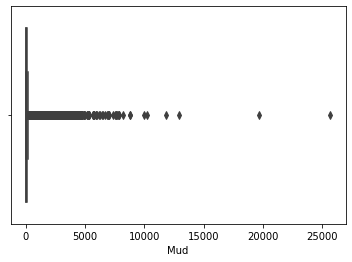

In [ ]:
max_thresold = dataset['Mud'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['Mud'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['Mud']<max_thresold) & (dataset['Mud']>min_thresold)]
print(dataset[(dataset['Mud']>max_thresold) & (dataset['Mud']min_thresold)]["Class"].sum())
"""
sns.boxplot(x=dataset["Mud"])


2.2381772428
-6.5256609352


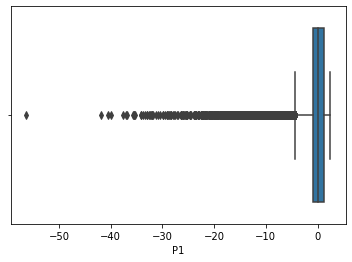

In [ ]:
max_thresold = dataset['P1'].quantile(0.99)
print(max_thresold)


min_thresold = dataset['P1'].quantile(0.01)
print(min_thresold)

"""
dataset = dataset[(dataset['P1']<max_thresold) & (dataset['P1']>min_thresold)]
print(dataset[(dataset['P1']<max_thresold) & (dataset['P1']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P1"])

1.8059130689999998
-1.9744760289999999


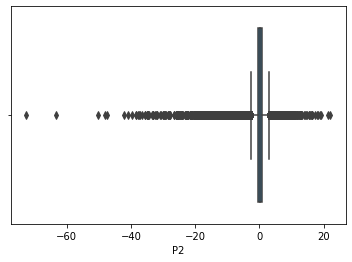

In [ ]:
max_thresold = dataset['P2'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P2'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P2']<max_thresold) & (dataset['P2']>min_thresold)]
print(dataset[(dataset['P2']<max_thresold) & (dataset['P2']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P2"])

2.0603833853999993
-2.3914704847999997


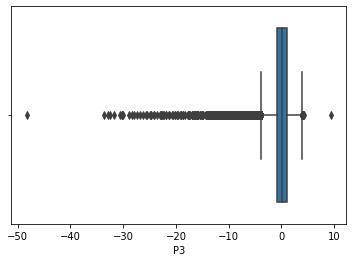

In [ ]:
max_thresold = dataset['P3'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P3'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P3']<max_thresold) & (dataset['P3']>min_thresold)]
print(dataset[(dataset['P3']<max_thresold) & (dataset['P3']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P3"])

1.0485980213999992
-0.8507066254


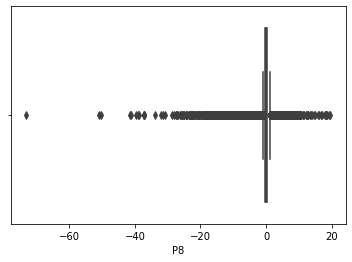

In [ ]:
max_thresold = dataset['P8'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P8'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P8']<max_thresold) & (dataset['P8']>min_thresold)]
print(dataset[(dataset['P8']<max_thresold) & (dataset['P8']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P8"])

0.5401274583999993
-0.5036268145999999


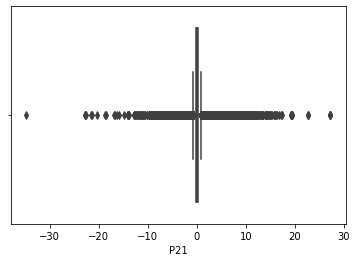

In [ ]:
max_thresold = dataset['P21'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P21'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P21']<max_thresold) & (dataset['P21']>min_thresold)]
print(dataset[(dataset['P21']<max_thresold) & (dataset['P21']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P21"])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  int64  
 1   P1      227845 non-null  float64
 2   P2      227845 non-null  float64
 3   P3      227845 non-null  float64
 4   P4      227845 non-null  float64
 5   P5      227845 non-null  float64
 6   P6      227845 non-null  float64
 7   P7      227845 non-null  float64
 8   P8      227845 non-null  float64
 9   P9      227845 non-null  float64
 10  P10     227845 non-null  float64
 11  P11     227845 non-null  float64
 12  P12     227845 non-null  float64
 13  P13     227845 non-null  float64
 14  P14     227845 non-null  float64
 15  P15     227845 non-null  float64
 16  P16     227845 non-null  float64
 17  P17     227845 non-null  float64
 18  P18     227845 non-null  float64
 19  P19     227845 non-null  float64
 20  P20     227845 non-null  float64
 21  P21     22

In [ ]:
dataset.describe()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Mud,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94966.864948,0.002738,-0.001529,-0.003254,-0.000449,0.000871,0.000050,-0.000260,-0.001623,0.000212,...,0.001047,0.001319,0.000032,-0.001556,-0.000354,0.000057,0.000031,-0.000268,88.424482,0.001756
std,47487.020802,1.954716,1.646701,1.513140,1.414424,1.381110,1.334873,1.239139,1.192474,1.096472,...,0.736814,0.725651,0.620242,0.606085,0.521178,0.482106,0.403996,0.327666,249.347169,0.041863
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-8.696627,-2.534330,-22.565679,-15.430084,0.000000,0.000000
25%,54309.000000,-0.920268,-0.600276,-0.896437,-0.848486,-0.690687,-0.768749,-0.554143,-0.209991,-0.642390,...,-0.228220,-0.541145,-0.161461,-0.356083,-0.317387,-0.326622,-0.070858,-0.053164,5.500000,0.000000
50%,84963.000000,0.020812,0.064672,0.175198,-0.019215,-0.053382,-0.274153,0.039755,0.021668,-0.050217,...,-0.029240,0.007541,-0.010866,0.040321,0.015574,-0.052702,0.001254,0.011025,22.000000,0.000000
75%,139440.000000,1.318048,0.802097,1.025248,0.742431,0.611269,0.400802,0.569990,0.327050,0.597317,...,0.187357,0.530401,0.148076,0.438062,0.350223,0.240849,0.091120,0.078033,77.520000,0.000000
max,172788.000000,2.454930,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,19.587773,15.594995,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
def plot_corr(df, size=29):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

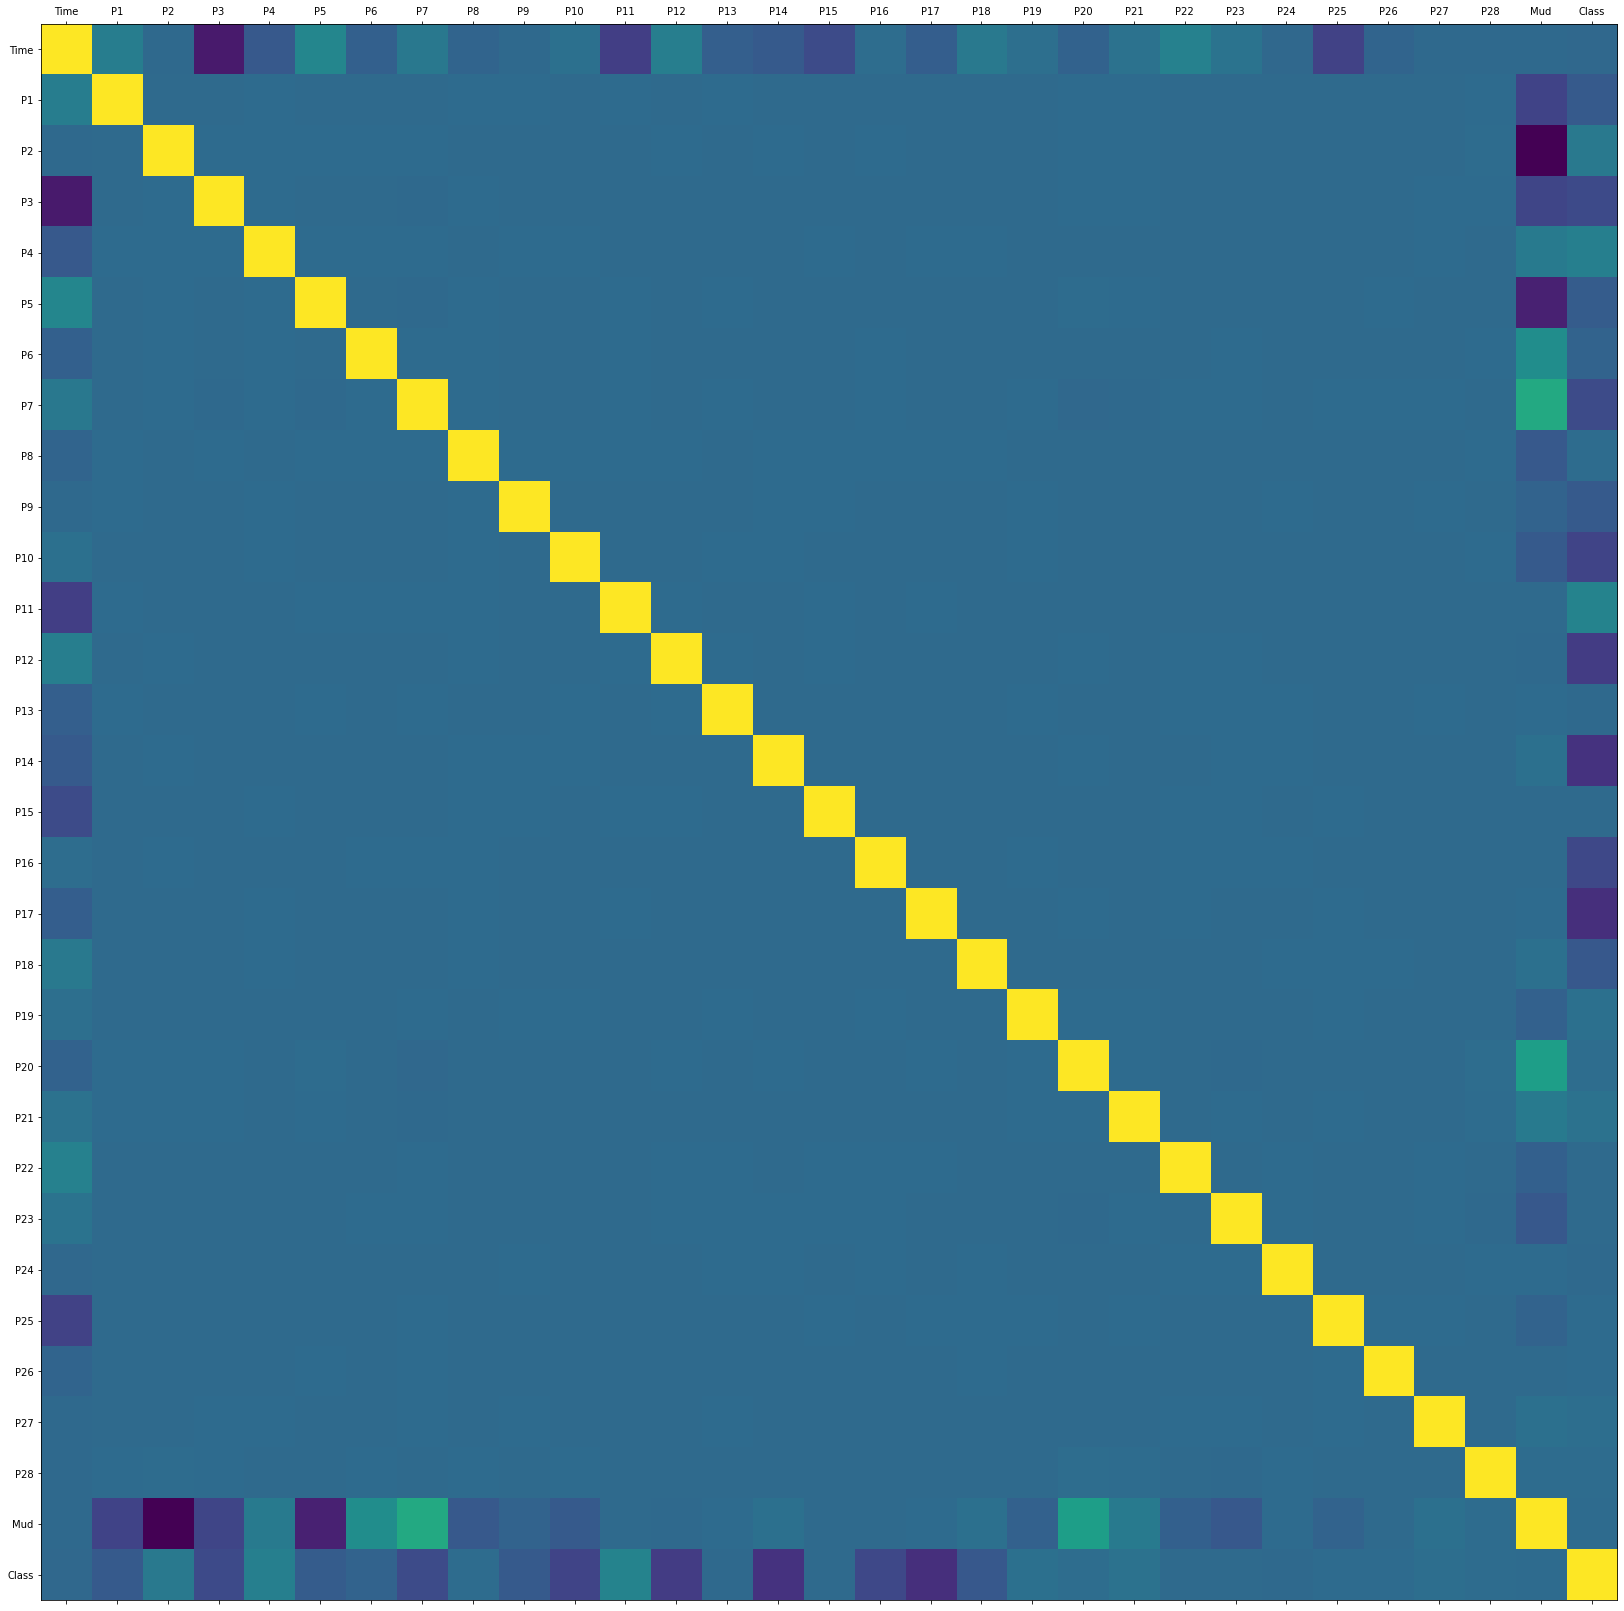

In [ ]:
plot_corr(dataset)

In [ ]:
X = dataset.drop('Class',axis='columns')
Y = dataset['Class']

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
x, y = sm.fit_resample(X, Y)

In [ ]:
x.shape

(454890, 30)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nx_train=sc.fit_transform(x_train)\nx_test=sc.transform(x_test)\n'

**Feature Dropping and Feature selection**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.4)
var_thres.fit(x_train)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True])

In [ ]:
x_train.corr()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P20,P21,P22,P23,P24,P25,P26,P27,P28,Mud
Time,1.000000,0.255246,-0.238469,0.161282,-0.222522,0.306183,0.113983,0.239092,-0.120856,0.181386,...,-0.047796,-0.068388,0.126831,0.052957,-0.005312,-0.214083,-0.069033,-0.179875,-0.013300,0.014092
P1,0.255246,1.000000,-0.798052,0.871861,-0.613613,0.853934,0.288845,0.876900,-0.030146,0.647531,...,-0.266681,-0.072286,0.037907,-0.068848,-0.039340,-0.101975,0.061107,0.128433,0.121424,-0.045350
P2,-0.238469,-0.798052,1.000000,-0.852150,0.673303,-0.778433,-0.254832,-0.851669,-0.090276,-0.675572,...,0.275833,0.150892,-0.098127,0.172669,-0.026952,0.116195,-0.012690,-0.098020,0.027859,-0.238799
P3,0.161282,0.871861,-0.852150,1.000000,-0.782146,0.840634,0.443298,0.883045,-0.128298,0.764892,...,-0.332867,-0.024730,-0.021898,-0.036184,0.035663,-0.100352,-0.015614,0.054931,0.085591,-0.010565
P4,-0.222522,-0.613613,0.673303,-0.782146,1.000000,-0.575189,-0.451355,-0.709625,0.096711,-0.792735,...,0.276529,0.008596,0.093840,0.005831,-0.091311,-0.008318,0.137269,0.019616,-0.037854,-0.000764
P5,0.306183,0.853934,-0.778433,0.840634,-0.575189,1.000000,0.290580,0.828669,-0.175828,0.648443,...,-0.290687,-0.013417,-0.036471,-0.072353,-0.119378,-0.106310,0.061205,0.126237,0.129883,-0.121399
P6,0.113983,0.288845,-0.254832,0.443298,-0.451355,0.290580,1.000000,0.255101,-0.584778,0.402807,...,-0.164061,0.138411,-0.121020,0.349567,-0.029738,-0.130828,-0.063427,-0.150083,-0.014383,0.166555
P7,0.239092,0.876900,-0.851669,0.883045,-0.709625,0.828669,0.255101,1.000000,0.137117,0.749551,...,-0.330238,-0.079959,-0.014487,-0.127287,-0.010135,0.024983,0.030812,0.168577,0.099102,0.127905
P8,-0.120856,-0.030146,-0.090276,-0.128298,0.096711,-0.175828,-0.584778,0.137117,1.000000,-0.100935,...,0.071144,-0.330591,0.236826,-0.503347,0.108426,0.203710,0.066045,0.227528,-0.066215,0.023178
P9,0.181386,0.647531,-0.675572,0.764892,-0.792735,0.648443,0.402807,0.749551,-0.100935,1.000000,...,-0.371213,0.122491,-0.209576,-0.016763,0.015332,-0.018105,-0.113616,0.073810,0.125181,0.025034


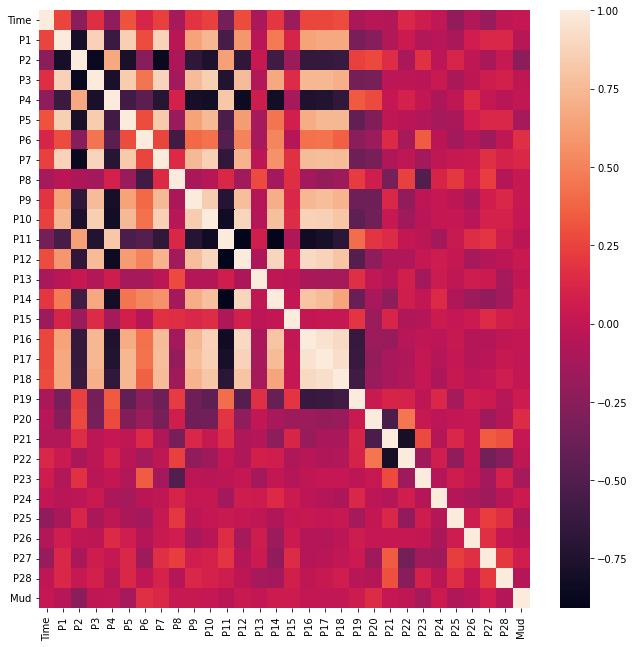

In [ ]:
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.9)
len(set(corr_features))
print(corr_features)

{'P18', 'P16', 'P12', 'P17'}


In [ ]:
x_train = x_train.drop(['P12','P17','P18'], axis=1)
x_test = x_test.drop(['P12','P17','P18'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#f1scorelgbm=0.999487
#f1scoredecisiontree=0.998453


# from sklearn.tree import DecisionTreeClassifier
# classifier=DecisionTreeClassifier(criterion='entropy')
# classifier.fit(x_train,y_train)


from xgboost import XGBClassifier

classifier=XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
classifier.fit(x_train,y_train)


"""
from lightgbm import LGBMClassifier
classifier=LGBMClassifier()
classifier.fit(x_train,y_train)
"""

"""
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='entropy',n_estimators=150)
classifier.fit(x_train,y_train)
"""

"""
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,batch_size=32,epochs=20)

y_pred=ann.predict(x_test)
y_pred=(y_pred>=0.5)

from sklearn.metrics import f1_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
f1_score(y_test,y_pred)
"""



"\nimport tensorflow as tf\nann=tf.keras.models.Sequential()\nann.add(tf.keras.layers.Dense(units=128,activation='relu'))\nann.add(tf.keras.layers.Dense(units=128,activation='relu'))\nann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))\n\nann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])\nann.fit(x_train,y_train,batch_size=32,epochs=20)\n\ny_pred=ann.predict(x_test)\ny_pred=(y_pred>=0.5)\n\nfrom sklearn.metrics import f1_score,confusion_matrix\ncm=confusion_matrix(y_test,y_pred)\nprint(cm)\nf1_score(y_test,y_pred)\n"

In [ ]:
"""
from sklearn.svm import SVC

classfier = SVC(kernel = "rbf", random_state = 43)
classfier.fit(x_train,y_train)
"""

'\nfrom sklearn.svm import SVC\n\nclassfier = SVC(kernel = "rbf", random_state = 43)\nclassfier.fit(x_train,y_train)\n'

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
f1_score(y_test,y_pred,average='macro')

[[68378    42]
 [    0 68047]]


0.9996922314765584

In [ ]:
import pickle
# open a file, where you ant to store the data
filename = 'XGB.pkl'
pickle.dump(classifier,open(filename,'wb'))

# dump information to that file
pickle.load(open(filename,'rb'))

XGBClassifier(max_depth=7, missing=nan, n_estimators=500)